In [1]:
# ---------------------------------------------
# Install Required Libraries (Run only once)
# ---------------------------------------------
!pip install pandas matplotlib seaborn numpy


In [2]:
# ---------------------------------------------
# Import Libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Environment setup complete.")


✅ Environment setup complete.


In [ ]:
# ---------------------------------------------
# Load Dataset
# ---------------------------------------------
df = pd.read_csv(""C:\Users\ANUSHA\Downloads\Netflix Dataset.csv"")

# Basic info
print("Shape of Dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

# Preview first 5 rows
df.head()


Shape of Dataset: (7789, 11)

Column Names: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Data Types:
 Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object


Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
# ---------------------------------------------
# Data Cleaning
# ---------------------------------------------

# Convert Release_Date to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract release year
df['Release_Year'] = df['Release_Date'].dt.year

# Drop rows where Release_Year is missing
df = df.dropna(subset=['Release_Year'])

# Strip extra spaces and standardize text columns
text_cols = ['Category', 'Type', 'Country', 'Rating']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing 'Country' and 'Rating' with 'Unknown'
df['Country'] = df['Country'].replace('', np.nan).fillna('Unknown')
df['Rating'] = df['Rating'].replace('', np.nan).fillna('Unknown')

print("\n✅ Data Preprocessing Complete.")



Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2295
Cast             710
Country            0
Release_Date       0
Rating             0
Duration           0
Type               0
Description        0
Release_Year       0
dtype: int64

✅ Data Preprocessing Complete.


In [6]:
# ---------------------------------------------
# EDA — Basic Statistical Insights
# ---------------------------------------------

# Dataset overview
print("Number of Unique Titles:", df['Title'].nunique())
print("Number of Movies:", (df['Type'] == 'Movie').sum())
print("Number of TV Shows:", (df['Type'] == 'TV Show').sum())

# Release year range
print("Earliest Release Year:", int(df['Release_Year'].min()))
print("Latest Release Year:", int(df['Release_Year'].max()))

# Top 10 producing countries
top_countries = df['Country'].value_counts().head(10)
print("\nTop 10 Countries by Content Count:\n", top_countries)


Number of Unique Titles: 7689
Number of Movies: 0
Number of TV Shows: 0
Earliest Release Year: 2008
Latest Release Year: 2021

Top 10 Countries by Content Count:
 Country
United States     2516
India              922
nan                503
United Kingdom     381
Japan              222
South Korea        179
Canada             169
Spain              130
France             113
Egypt              101
Name: count, dtype: int64


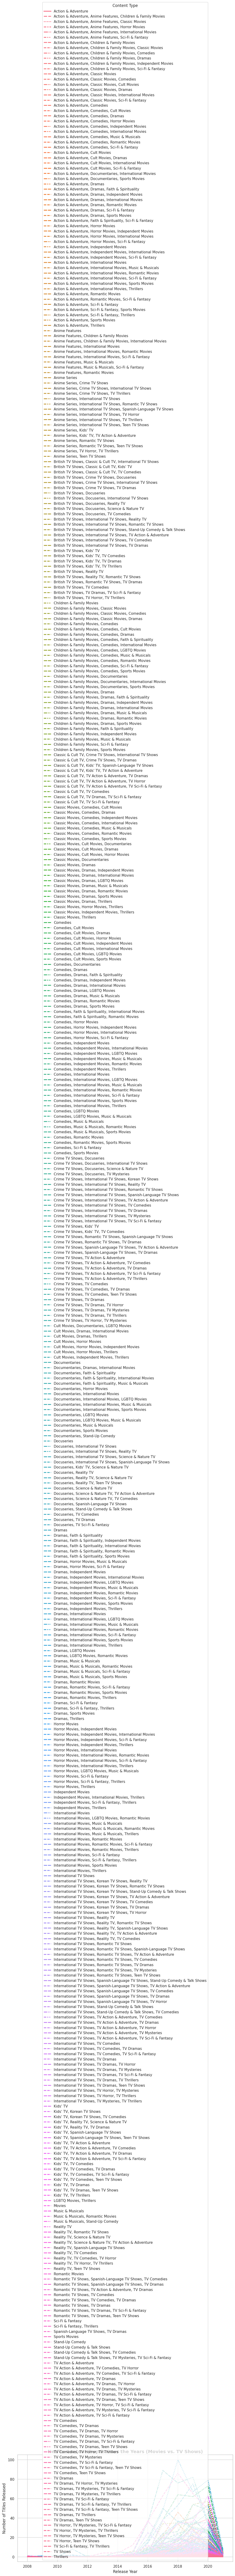

In [7]:
# ---------------------------------------------
# Content Type Trends (Movies vs. TV Shows)
# ---------------------------------------------
content_trends = df.groupby(['Release_Year', 'Type']).size().reset_index(name='Count')

# Pivot table for easier visualization
trend_pivot = content_trends.pivot(index='Release_Year', columns='Type', values='Count').fillna(0)

# Line Chart
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_pivot, linewidth=2.5)
plt.title("Netflix Content Trends Over the Years (Movies vs. TV Shows)", fontsize=14, fontweight='bold')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.legend(title="Content Type")
plt.show()


/tmp/ipython-input-1432376771.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


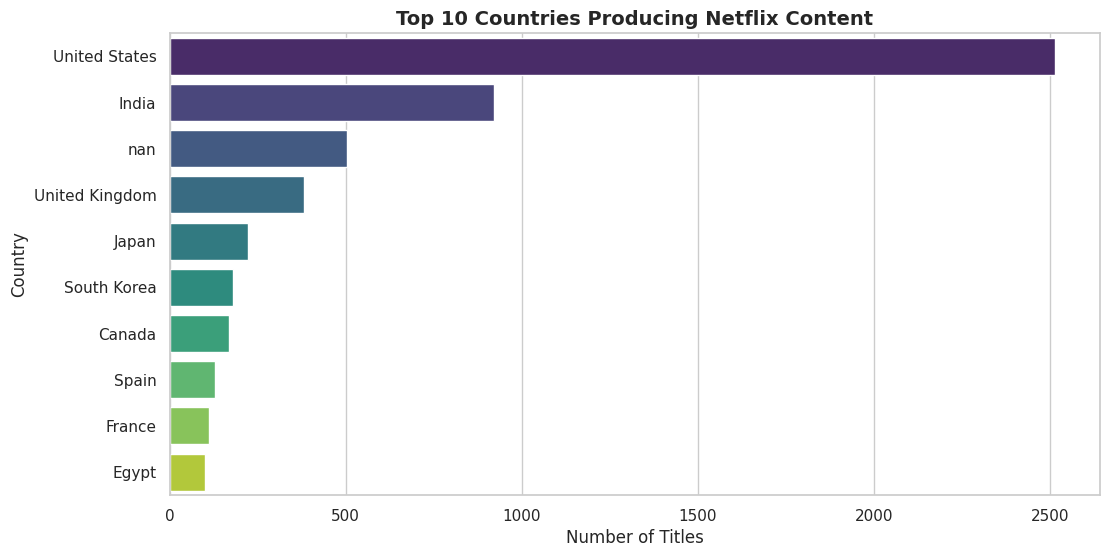

In [13]:
# ---------------------------------------------
# Top 10 Countries Producing Content
# ---------------------------------------------
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries Producing Netflix Content", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


In [5]:
# ---------------------------------------------
# Import Libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Environment setup complete.")

✅ Environment setup complete.


In [6]:
# ---------------------------------------------
# Data Cleaning
# ---------------------------------------------

# Convert Release_Date to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract release year
df['Release_Year'] = df['Release_Date'].dt.year

# Drop rows where Release_Year is missing
df = df.dropna(subset=['Release_Year'])

# Strip extra spaces and standardize text columns
text_cols = ['Category', 'Type', 'Country', 'Rating']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing 'Country' and 'Rating' with 'Unknown'
df['Country'] = df['Country'].replace('', np.nan).fillna('Unknown')
df['Rating'] = df['Rating'].replace('', np.nan).fillna('Unknown')

print("\n✅ Data Preprocessing Complete.")


Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2295
Cast             710
Country            0
Release_Date       0
Rating             0
Duration           0
Type               0
Description        0
Release_Year       0
dtype: int64

✅ Data Preprocessing Complete.


In [7]:
# ---------------------------------------------
# Example Filters
# ---------------------------------------------

# Filter only Movies
movies_df = df[df['Type'] == 'Movie']

# Filter only TV Shows
tv_df = df[df['Type'] == 'TV Show']

# Filter content released after 2018
recent_content = df[df['Release_Year'] >= 2018]

# Filter content from a specific country
us_content = df[df['Country'].str.contains("United States", case=False, na=False)]

print("Movies:", movies_df.shape[0])
print("TV Shows:", tv_df.shape[0])
print("Recent (After 2018):", recent_content.shape[0])
print("US Content:", us_content.shape[0])


Movies: 0
TV Shows: 0
Recent (After 2018): 5924
US Content: 3251


In [12]:
# ---------------------------------------------
# Generate Quick Insight Summary
# ---------------------------------------------
most_recent_year = int(df['Release_Year'].max())
latest_trend = trend_pivot.loc[most_recent_year]

print(f"📅 Latest Year in Data: {most_recent_year}")
print(f"🎬 Movies Released: {int(latest_trend.get('Movie', 0))}")
print(f"📺 TV Shows Released: {int(latest_trend.get('TV Show', 0))}")

# Overall content share
share = df['Type'].value_counts(normalize=True) * 100
print("\n📊 Overall Content Share (%):")
print(share)


📅 Latest Year in Data: 2021
🎬 Movies Released: 0
📺 TV Shows Released: 0

📊 Overall Content Share (%):
Type
Documentaries                                                                      4.342738
Stand-Up Comedy                                                                    4.173710
Dramas, International Movies                                                       4.160707
Comedies, Dramas, International Movies                                             3.159537
Dramas, Independent Movies, International Movies                                   2.795475
                                                                                     ...   
LGBTQ Movies, Thrillers                                                            0.013002
Action & Adventure, Sports Movies                                                  0.013002
Sports Movies                                                                      0.013002
Kids' TV, Reality TV, Science & Nature TV                        

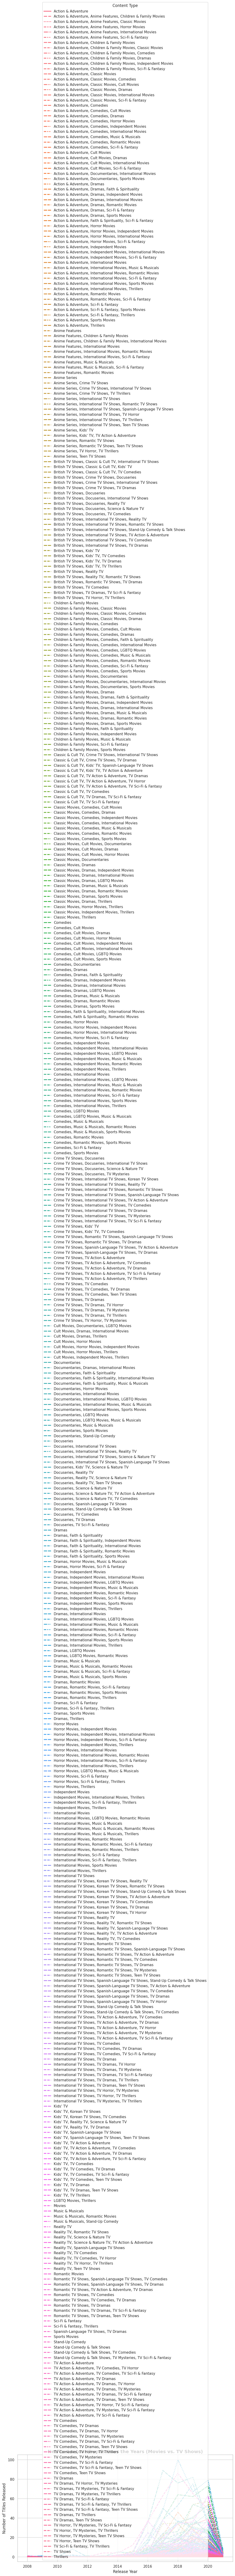

In [11]:
# ---------------------------------------------
# Content Type Trends (Movies vs. TV Shows)
# ---------------------------------------------
content_trends = df.groupby(['Release_Year', 'Type']).size().reset_index(name='Count')

# Pivot table for easier visualization
trend_pivot = content_trends.pivot(index='Release_Year', columns='Type', values='Count').fillna(0)

# Line Chart
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_pivot, linewidth=2.5)
plt.title("Netflix Content Trends Over the Years (Movies vs. TV Shows)", fontsize=14, fontweight='bold')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.legend(title="Content Type")
plt.show()

In [17]:
# Convert to lowercase, remove punctuation/numbers
df['Clean_Description'] = (
    df['Description']
    .astype(str)
    .str.lower()
    .str.replace('[^a-z\s]', '', regex=True)
)

# Preview cleaned descriptions
df[['Description', 'Clean_Description']].head()


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1348329533.py:6: SyntaxWarning: invalid escape sequence '\s'
  .str.replace('[^a-z\s]', '', regex=True)


Description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                   Clean_Description  
0  in a future where the elite inhabit an island ...  
1  after a devastating earthquake hits mexico cit...  
2  when an army recruit is found dead his fellow ...  
3  in a postapocalyptic world ragdoll robots hide...  
4  a brilliant group of students become cardcount...

In [18]:
# Genre keyword dictionary
genre_keywords = {
    'drama': ['drama', 'emotional', 'tragic', 'relationship'],
    'comedy': ['comedy', 'funny', 'humor', 'satire', 'parody'],
    'action': ['action', 'fight', 'battle', 'war', 'adventure'],
    'thriller': ['thriller', 'suspense', 'mystery', 'crime'],
    'romance': ['romance', 'love', 'affair', 'relationship'],
    'horror': ['horror', 'scary', 'fear', 'ghost', 'haunted'],
    'documentary': ['documentary', 'real', 'true story', 'biography'],
    'animation': ['animation', 'animated', 'cartoon'],
    'sci-fi': ['science fiction', 'sci-fi', 'space', 'future'],
    'fantasy': ['fantasy', 'magic', 'myth', 'legend']
}


In [20]:
# ---------------------------------------------
# Extract Genre from Description
# ---------------------------------------------
import re

def extract_genre(description):
    matched_genres = []
    for genre, keywords in genre_keywords.items():
        for word in keywords:
            if re.search(rf'\b{word}\b', description):
                matched_genres.append(genre)
                break
    if matched_genres:
        return ', '.join(matched_genres)
    else:
        return 'Unknown'

# Apply the function
df['Inferred_Genre'] = df['Clean_Description'].apply(extract_genre)

# Preview result
display(df[['Title', 'Type', 'Inferred_Genre', 'Description']].head(10))

Title                                               Type Inferred_Genre  \
0     3%  International TV Shows, TV Dramas, TV Sci-Fi &...         sci-fi   
1  07:19                       Dramas, International Movies        Unknown   
2  23:59                Horror Movies, International Movies        Unknown   
3      9  Action & Adventure, Independent Movies, Sci-Fi...         horror   
4     21                                             Dramas        Unknown   
5     46    International TV Shows, TV Dramas, TV Mysteries        Unknown   
6    122                Horror Movies, International Movies        Unknown   
7    187                                             Dramas        Unknown   
8    706                Horror Movies, International Movies        Unknown   
9   1920     Horror Movies, International Movies, Thrillers        Unknown   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...  
9  An architect and his wife move into a castle t...

/tmp/ipython-input-602398905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="coolwarm")


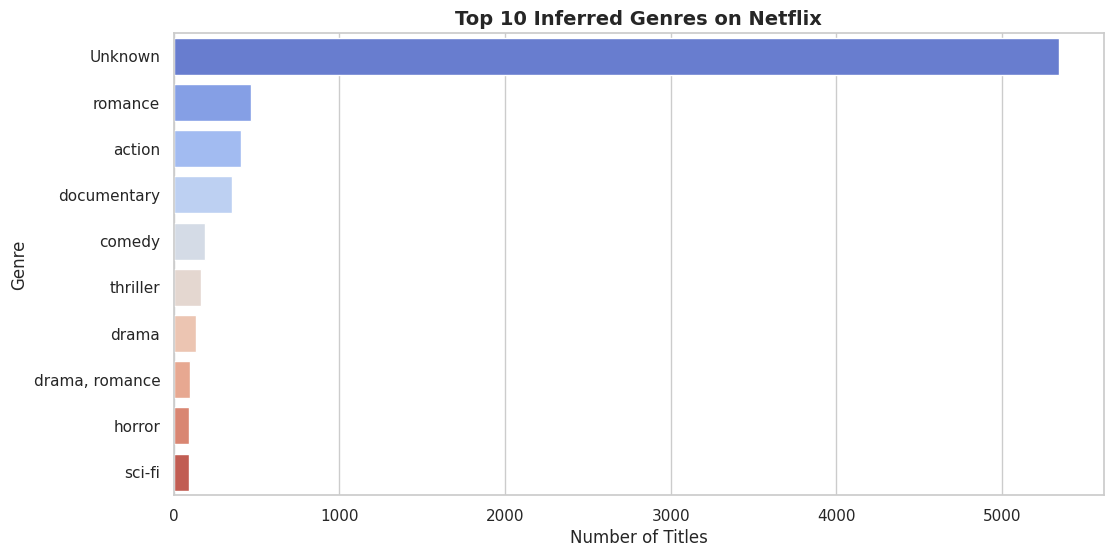

In [21]:
# Count most common genres
genre_counts = df['Inferred_Genre'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="coolwarm")
plt.title("Top 10 Inferred Genres on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


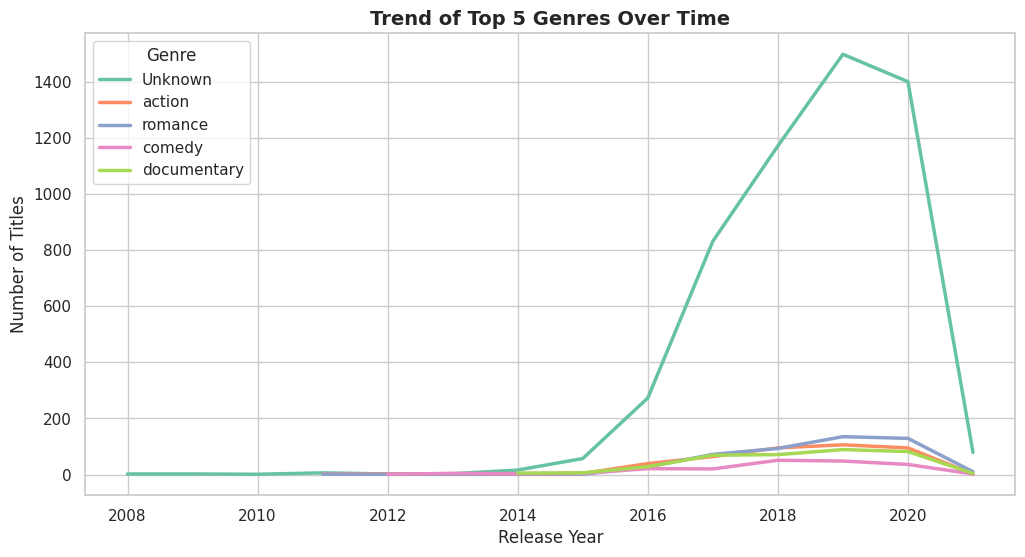

In [22]:
# Group by year and genre
genre_trends = df.groupby(['Release_Year', 'Inferred_Genre']).size().reset_index(name='Count')

# Focus on top 5 genres
top_genres = genre_counts.index[:5]
genre_trends = genre_trends[genre_trends['Inferred_Genre'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trends, x='Release_Year', y='Count', hue='Inferred_Genre', linewidth=2.5)
plt.title("Trend of Top 5 Genres Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()


In [24]:
!pip install wordcloud

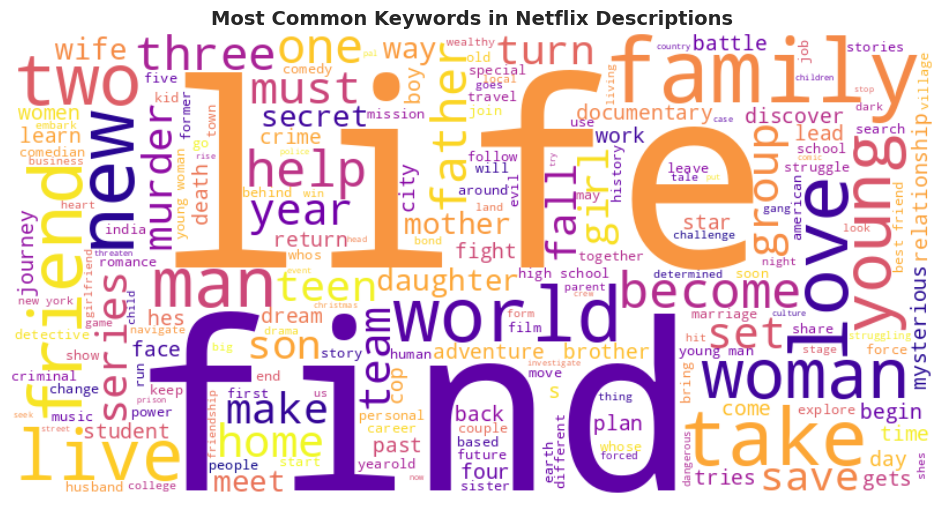

In [25]:
# ---------------------------------------------
# Visualize Keywords in Descriptions (Word Cloud)
# ---------------------------------------------
from wordcloud import WordCloud

# Combine all descriptions
all_text = ' '.join(df['Clean_Description'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Keywords in Netflix Descriptions", fontsize=14, fontweight='bold')
plt.show()